#### Trend analyisis of Covid-19
###### Background
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell.
######  HOW IT SPREADS
Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth.
##### Prevention
There’s currently no vaccine to prevent coronavirus disease (COVID-19)
You can protect yourself and help prevent spreading the virus to others if you:
Do
* Wash your hands regularly for 20 seconds, with soap and water or alcohol-based hand rub
* Cover your nose and mouth with a disposable tissue or flexed elbow when you cough or sneeze
* Avoid close contact (1 meter or 3 feet) with people who are unwell
* Stay home and self-isolate from others in the household if you feel unwell
Don't
* Touch your eyes, nose, or mouth if your hands are not clean


#####   Due to the lockdown occassioned by the Covid-19 pendamic, i had to find something to do indoors and i decided to take a course in Python programming.


We import data analyis library Pandas and the Matplotlib for data visualisation

In [335]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [74]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


* Some one collected the Covid-19 data and stored it in the github respository below.

In [75]:
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',sep=',')

In [76]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

What are the top rows? df.head gets top 5 rows 

In [78]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


Here i convert the date column to datetime field in order to be able to sort the data

In [79]:
df['Date']=pd.to_datetime(df['Date'])


Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

After sorting using confirmed cases , i get the top 100 records   and find the countries where this cases are

In [179]:
#get top 100 confirmed cases and find the countries 
df_max=df.sort_values(['Confirmed'],ascending=False)[:101]

In [180]:
countries=df_max['Country'].unique()

I can then list the countries with top cases

In [181]:
#print the countries
countries

array(['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran'],
      dtype=object)

let us sort data by date descending order

In [182]:

df=df.sort_values(['Date'],ascending=False)

* #### Here, i get a table(dataframe) for each of the identified countries and store it in a list.

In [183]:
#get a dataframe for each country
list_top_df=[]
for c in countries:
    #put name
    name='df_'+c
    #print(name)  
    list_top_df.append(df[(df['Country']==c)])  

    

* #### Then we add additional three columns (computed) based on confirmed ,Deaths,and recovered

In [336]:
for l in list_top_df:
    l['Daily_Infection']=l['Confirmed']-l['Confirmed'].shift(-1)
    l['Daily_Death']=l['Deaths']-l['Deaths'].shift(-1)
    l['Daily_Recovery']=l['Recovered']-l['Recovered'].shift(-1)
    

Here i created a dictionary to display a different color for each contry

In [332]:
#generating random colors failed to generate distinct colors.
# So i opted for hard coding the countries color
#import numpy as np
#list_colors=[]
#for i in range(0,len(list_top_df)):
          #color = list(np.random.choice(range(256), size=3))
          #color=[c/256 for c in color]
          
          #list_colors.append(color)
    
#print(list_colors)
def get_color(c):
        switcher={
                'China':'red',
                'Italy':'green',
                'US':'yellow',
                'Spain':'blue',
                'Germany':'orange',
                'France':'Purple',
                'Iran':'grey'
             }
        return switcher.get(c)

#### Here i plot the confirmed cases. 
We can see that China has flatened the curve while other countries the curves are sharply raising!

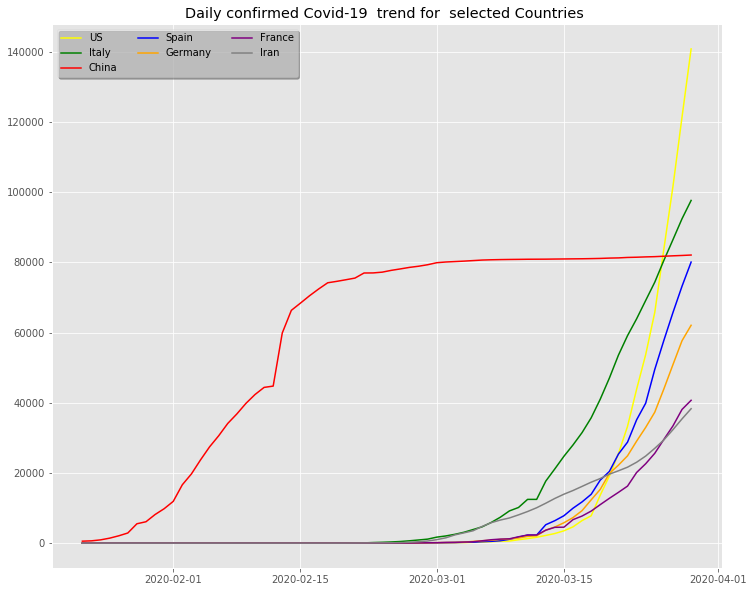

In [333]:
plt.figure(figsize=(12,10))
for i in range(0,len(list_top_df)):
    #list_top_df[i]
    plt.plot(list_top_df[i]['Date'],list_top_df[i]['Confirmed'],c= get_color(countries[i]),label=countries[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Daily confirmed Covid-19  trend for  selected Countries ')
    leg.get_frame().set_alpha(0.5)

#### Here i plot the daily infection rates for the selected countries.
The rates appear to pointing downwards ..

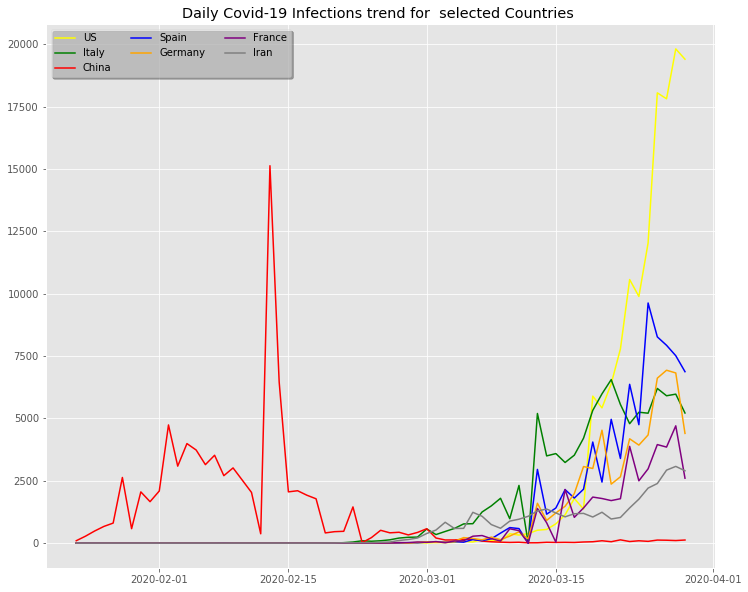

In [327]:
plt.figure(figsize=(12,10))
for i in range(0,len(list_top_df)):
    #list_top_df[i]
    plt.plot(list_top_df[i]['Date'],list_top_df[i]['Daily_Infection'],c= get_color(countries[i]),label=countries[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Daily Covid-19 Infections trend for  selected Countries ')
    leg.get_frame().set_alpha(0.5)

### Here i plot the daily revovery rate. Here no trend. 

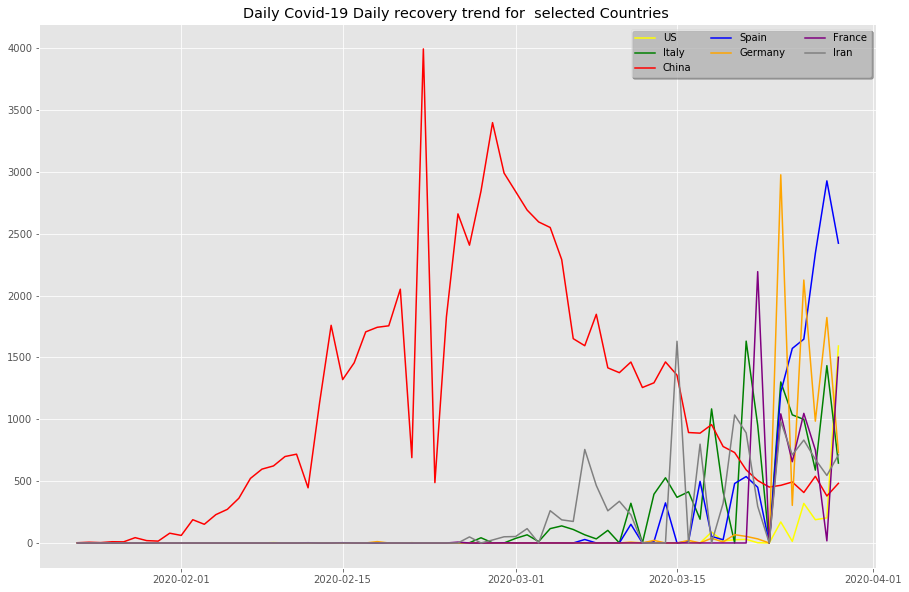

In [328]:
plt.figure(figsize=(15,10))
for i in range(0,len(list_top_df)):
    #list_top_df[i]
    plt.plot(list_top_df[i]['Date'],list_top_df[i]['Daily_Recovery'],c= get_color(countries[i]),label=countries[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Daily Covid-19 Daily recovery trend for  selected Countries ')
    leg.get_frame().set_alpha(0.5)

#### The grim part. Daily deaths. The trent is unfortunately raising.

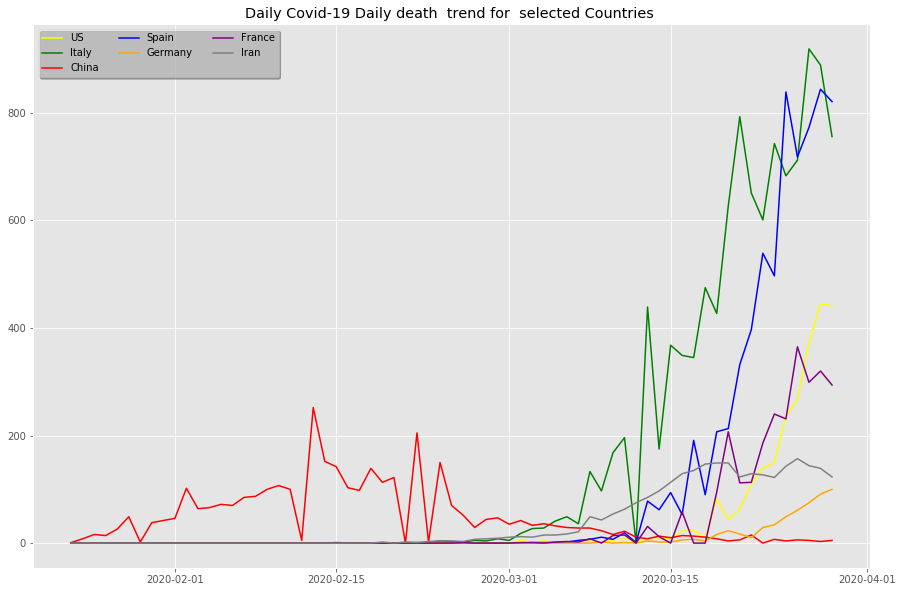

In [329]:
plt.figure(figsize=(15,10))
for i in range(0,len(list_top_df)):
    #list_top_df[i]
    plt.plot(list_top_df[i]['Date'],list_top_df[i]['Daily_Death'],c= get_color(countries[i]),label=countries[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Daily Covid-19 Daily death  trend for  selected Countries ')
    leg.get_frame().set_alpha(0.5)